# Linked Lists

There are two varieties of 'Linked Lists' when it comes to data structures.

These are:
1. Singly linked lists or uni-directional lists.
2. Doubly linked lists or bi-directional lists.


In [1]:
mylist = []

help(mylist)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |
 |  Built-in mutable sequence.
 |
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __getitem__(self, index, /)
 |      Return self[index].
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __it

In [16]:
# mylist = []
# print(mylist)

# mylist.append(1)
# print(mylist)

# mylist.append(2)
# print(mylist)

# How Python3 lists handle "insert"

# mylist.insert(100, "a")
# print(mylist)

mylist = []
# State 1
# mylist.insert(0, 5)
# mylist.insert(5, 5)
mylist.insert(-1, 5)
print(mylist)

# State 2
# mylist.append(1)
# mylist.insert(0, 5)
# mylist.insert(5, 5)
# print(mylist)

# State 3
# mylist.append(1)
# mylist.append(2)
# mylist.insert()


[5]


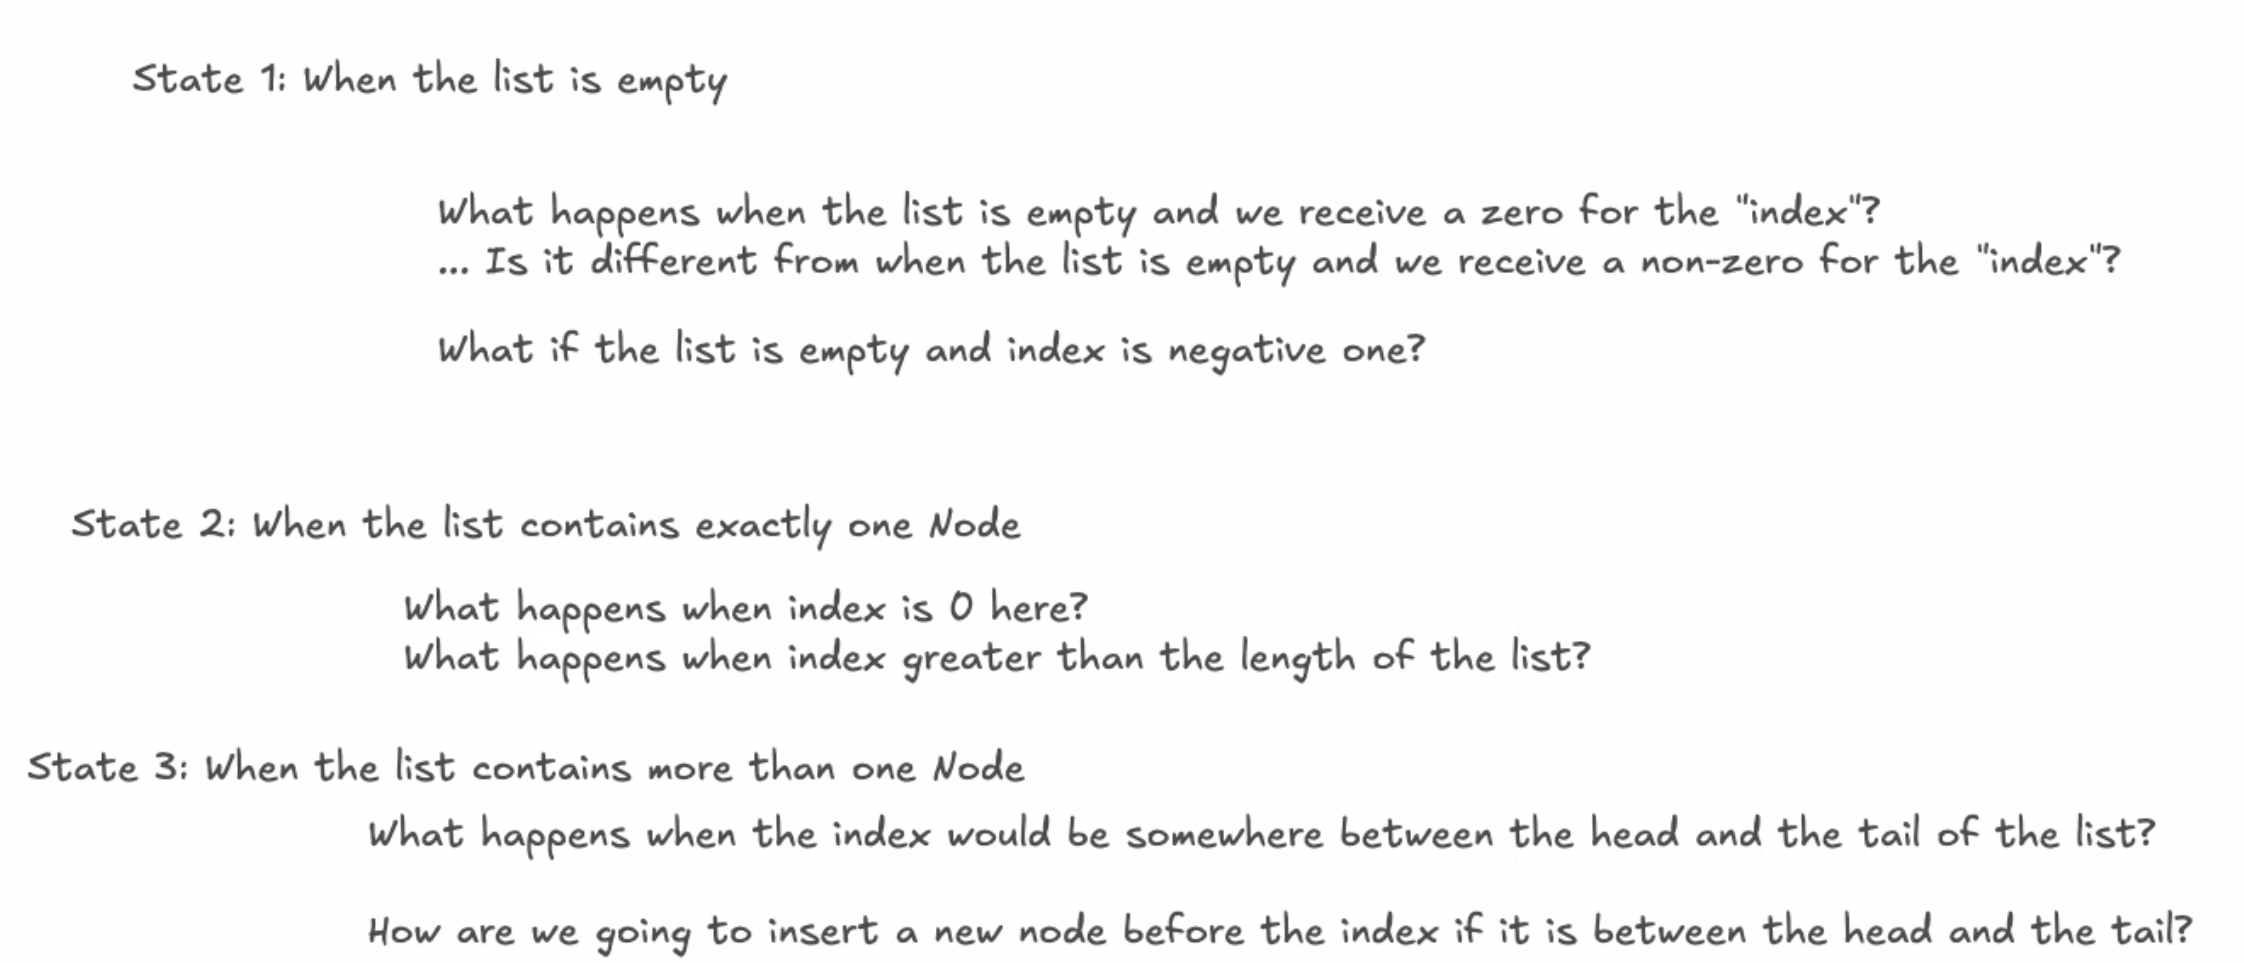

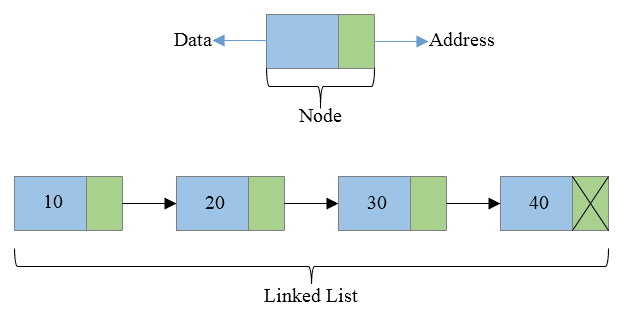

In [193]:
class SinglyLinkedList:
    class _Node:
        def __init__(self, datum):
            self.datum = datum
            self.next = None
            
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        
    def append(self, value):
        new_node = self._Node(value)
        self.count += 1
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            self.tail = new_node
    
    def insert(self, index, value):
        is_increment_count = False
        new_node = self._Node(value)
            
        # Insert at beginning (before index 0)
        if index <= 0:
            new_node.next = self.head
            self.head = new_node
            # If this was an empty list, update tail as well
            if not self.tail:
                self.tail = new_node
                
        # Insert at end (index == self.count)
        elif index >= self.count:
            self.append(value)
            is_increment_count = True  # append already increments count
        
        # Insert in the middle
        else:
            current = self.head
            for i in range(index - 1):
                current = current.next
            new_node.next = current.next
            current.next = new_node
            
        if is_increment_count == False:
            self.count += 1
    
    def remove(self, value):
        current = self.head
        prev = None
        
        # Check if the head has the value
        if current and current.datum == value:
            self.head = self.head.next
            self.count -= 1
            if not self.head:
                self.tail = None
        else:
            while current and current.datum != value:
                prev = current
                current = current.next
                
            if current and current.datum == value:
                self.count -= 1
                prev.next = current.next
                if current == self.tail:
                    self.tail = prev
            else:
                raise ValueError("Target value not found")

    
    def index(self, value):
        # This method returns the position in the list of the given "value" if it is present in the list.
        # Otherwise, it raises a ValueError if the value is not present in the list.
        count = 0
        current = self.head
        found = False
        
        while current and not found:
            if current.datum == value:
                found = True
            else:
                count += 1
                current = current.next
                
        if found:
            return count
            
        raise ValueError(f"{value} not in list")
    
    def search(self, index):
        if self.head:
            current = self.head
            count = 0
            
            # Check if the index is out of range
            if index < 0 or index >= self.count:
                raise IndexError("Index out of range")
            
            # Traverse the list until reaching the desired index
            while count < index:
                current = current.next
                count += 1
            
            return current.datum
        else:
            raise IndexError("This list is empty")
    
    def __str__(self):
        out = "["
        current = self.head
        if current:                 # while current is not equal to None
            out += "%s" % current.datum
            current = current.next
            while current:
                out += ", %s" % current.datum
                current = current.next
        out += "]"
        return out
    
    def __len__(self):
        # This method should return the total number of Nodes in this list.
        return self.count

In [203]:
# Create a list
sll = SinglyLinkedList()

# Add elements
sll.append("hello")
sll.append("bye")

# Insert an element in the middle
sll.insert(1, "chris")
print(sll)

# Get bye's index
print(sll.index("bye"))

# Get list length
print(len(sll))

# Remove an element
sll.remove("chris")
print(sll)

# Search an element by index
sll.search(1)

[hello, chris, bye]
2
3
[hello, bye]


'bye'